In [2]:
#first download the datasets. The binaries were created from https://www.kaggle.com/mloey1/ahdd1
!wget https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Digits/test-ubyte.npz
!wget https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Digits/train-ubyte.npz

--2019-05-28 02:26:08--  https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Digits/test-ubyte.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1555297 (1.5M) [application/octet-stream]
Saving to: ‘test-ubyte.npz’

test-ubyte.npz      100%[===================>]   1.48M  --.-KB/s    in 0.02s   

2019-05-28 02:26:09 (86.6 MB/s) - ‘test-ubyte.npz’ saved [1555297/1555297]

--2019-05-28 02:26:11--  https://raw.githubusercontent.com/zaidalyafeai/ARBML/master/datasets/Digits/train-ubyte.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 

# Imports 

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

# Load the Data 

In [4]:
x_train, y_train = np.load('train-ubyte.npz')['x'], np.load('train-ubyte.npz')['y']
x_test, y_test = np.load('test-ubyte.npz')['x'], np.load('test-ubyte.npz')['y']

print('training ', x_train.shape)
print('testing ', x_test.shape)

training  (59999, 784)
testing  (9999, 784)


# Preprocess the Data 

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

generator = datagen.flow(x_train, y_train, batch_size = 128)

# The Model 

In [9]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

# Training 

In [10]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
469/469 [==============================] - 13s 28ms/step - loss: 0.5970 - acc: 0.8085
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1872 - acc: 0.9436
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1337 - acc: 0.9601
Epoch 4/5
469/469 [==============================] - 14s 31ms/step - loss: 0.1164 - acc: 0.9647
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1040 - acc: 0.9695


# Testing 

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 98.48%


# Inference 

[9 6 8 0 5]


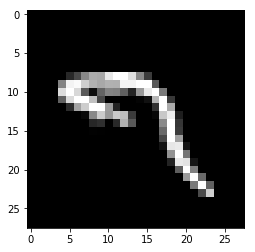

In [12]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze(), cmap = 'gray') 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
print(ind)

# Save and Convert 

In [0]:
model.save('keras.h5')

# Zip and Download 

In [0]:
from google.colab import files
files.download('keras.h5')